<a href="https://colab.research.google.com/github/AnshDham/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Mall Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Exploratory Data Analysis

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


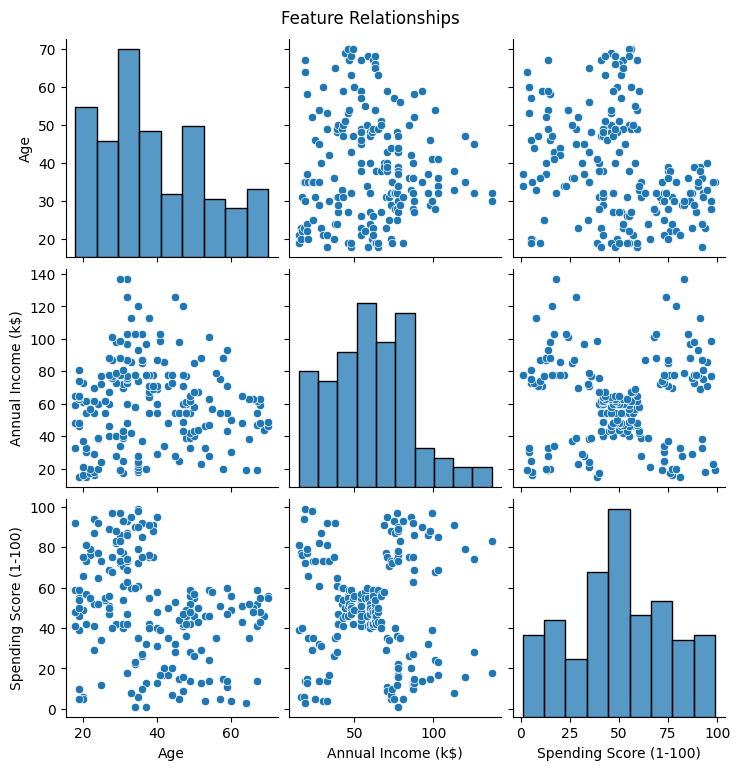

In [ ]:
# Visualize basic distributions:

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


In [ ]:
# Preprocess the Data

df_cleaned = df.drop(['CustomerID', 'Genre'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)


In [ ]:
# Apply PCA for Dimensionality Reduction

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


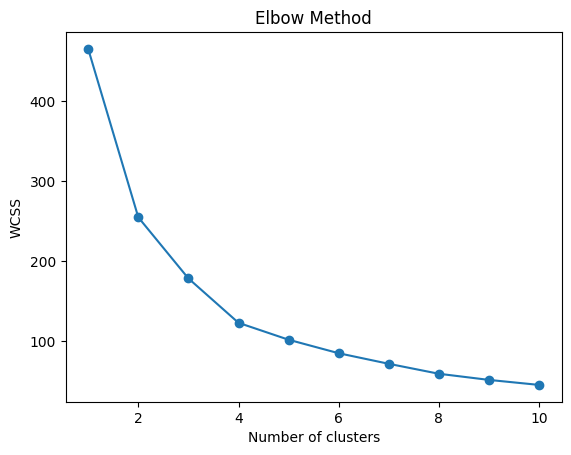

In [ ]:
#Using the Elbow Method to Find Optimal Clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Apply K-Means with Your Chosen k

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to your PCA dataframe
pca_df['Cluster'] = clusters


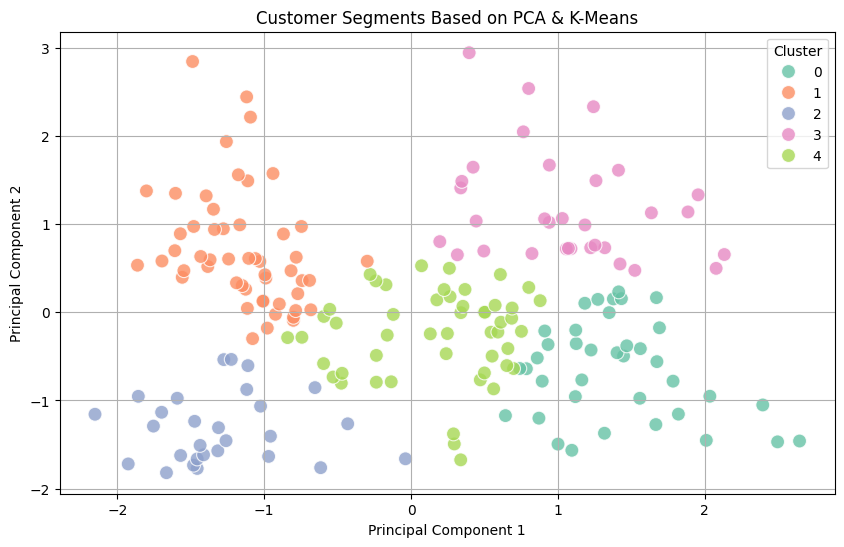

In [ ]:
# Visualize the Clusters in 2D PCA Space

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.8)
plt.title('Customer Segments Based on PCA & K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
#Interpret the Clusters

df_clustered = df_cleaned.copy()
df_clustered['Cluster'] = clusters

# Group by cluster and get mean profiles
cluster_summary = df_clustered.groupby('Cluster').mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        57.868421           41.815789               35.605263
1        29.942308           80.576923               74.000000
2        24.750000           27.821429               73.535714
3        43.031250           89.687500               17.343750
4        38.880000           53.680000               44.500000


In [ ]:
# Exporting Results

final_df = df.copy()
final_df['Cluster'] = clusters
final_df.to_csv('segmented_customers.csv', index=False)
